#### Labeling For Cloud Holel Dates

working on: 19/11/2005
['hrv_lr200511.nc']
working on: 20/11/2005
['hrv_lr200511.nc']
working on: 07/11/2006
['hrv_lr200611.nc']
working on: 30/11/2006
['hrv_lr200611.nc']
working on: 19/02/2007
[]
File: [] Date: 19/02/2007 Time: 16:00:00  Unexpected error: list index out of range
working on: 17/01/2015
['hrv_lr201501.nc']
working on: 17/02/2013
['hrv_lr201302.nc']
working on: 02/11/2015
['hrv_lr201511.nc']
working on: 12/11/2015
['hrv_lr201511.nc']
working on: 23/11/2015
['hrv_lr201511.nc']
working on: 20/01/2016
['hrv_lr201601.nc']
working on: 21/01/2016
['hrv_lr201601.nc']
working on: 30/12/2016
['hrv_lr201612.nc']
working on: 18/02/2017
['hrv_lr201702.nc']
working on: 17/02/2017
['hrv_lr201702.nc']
working on: 05/02/2019
['hrv_lr201902.nc']
File: ['hrv_lr201902.nc'] Date: 05/02/2019 Time: 16:00:00  Unexpected error: "not all values found in index 'time'. Try setting the `method` keyword argument (example: method='nearest')."
working on: 13/02/2019
['hrv_lr201902.nc']
File: ['hrv_lr

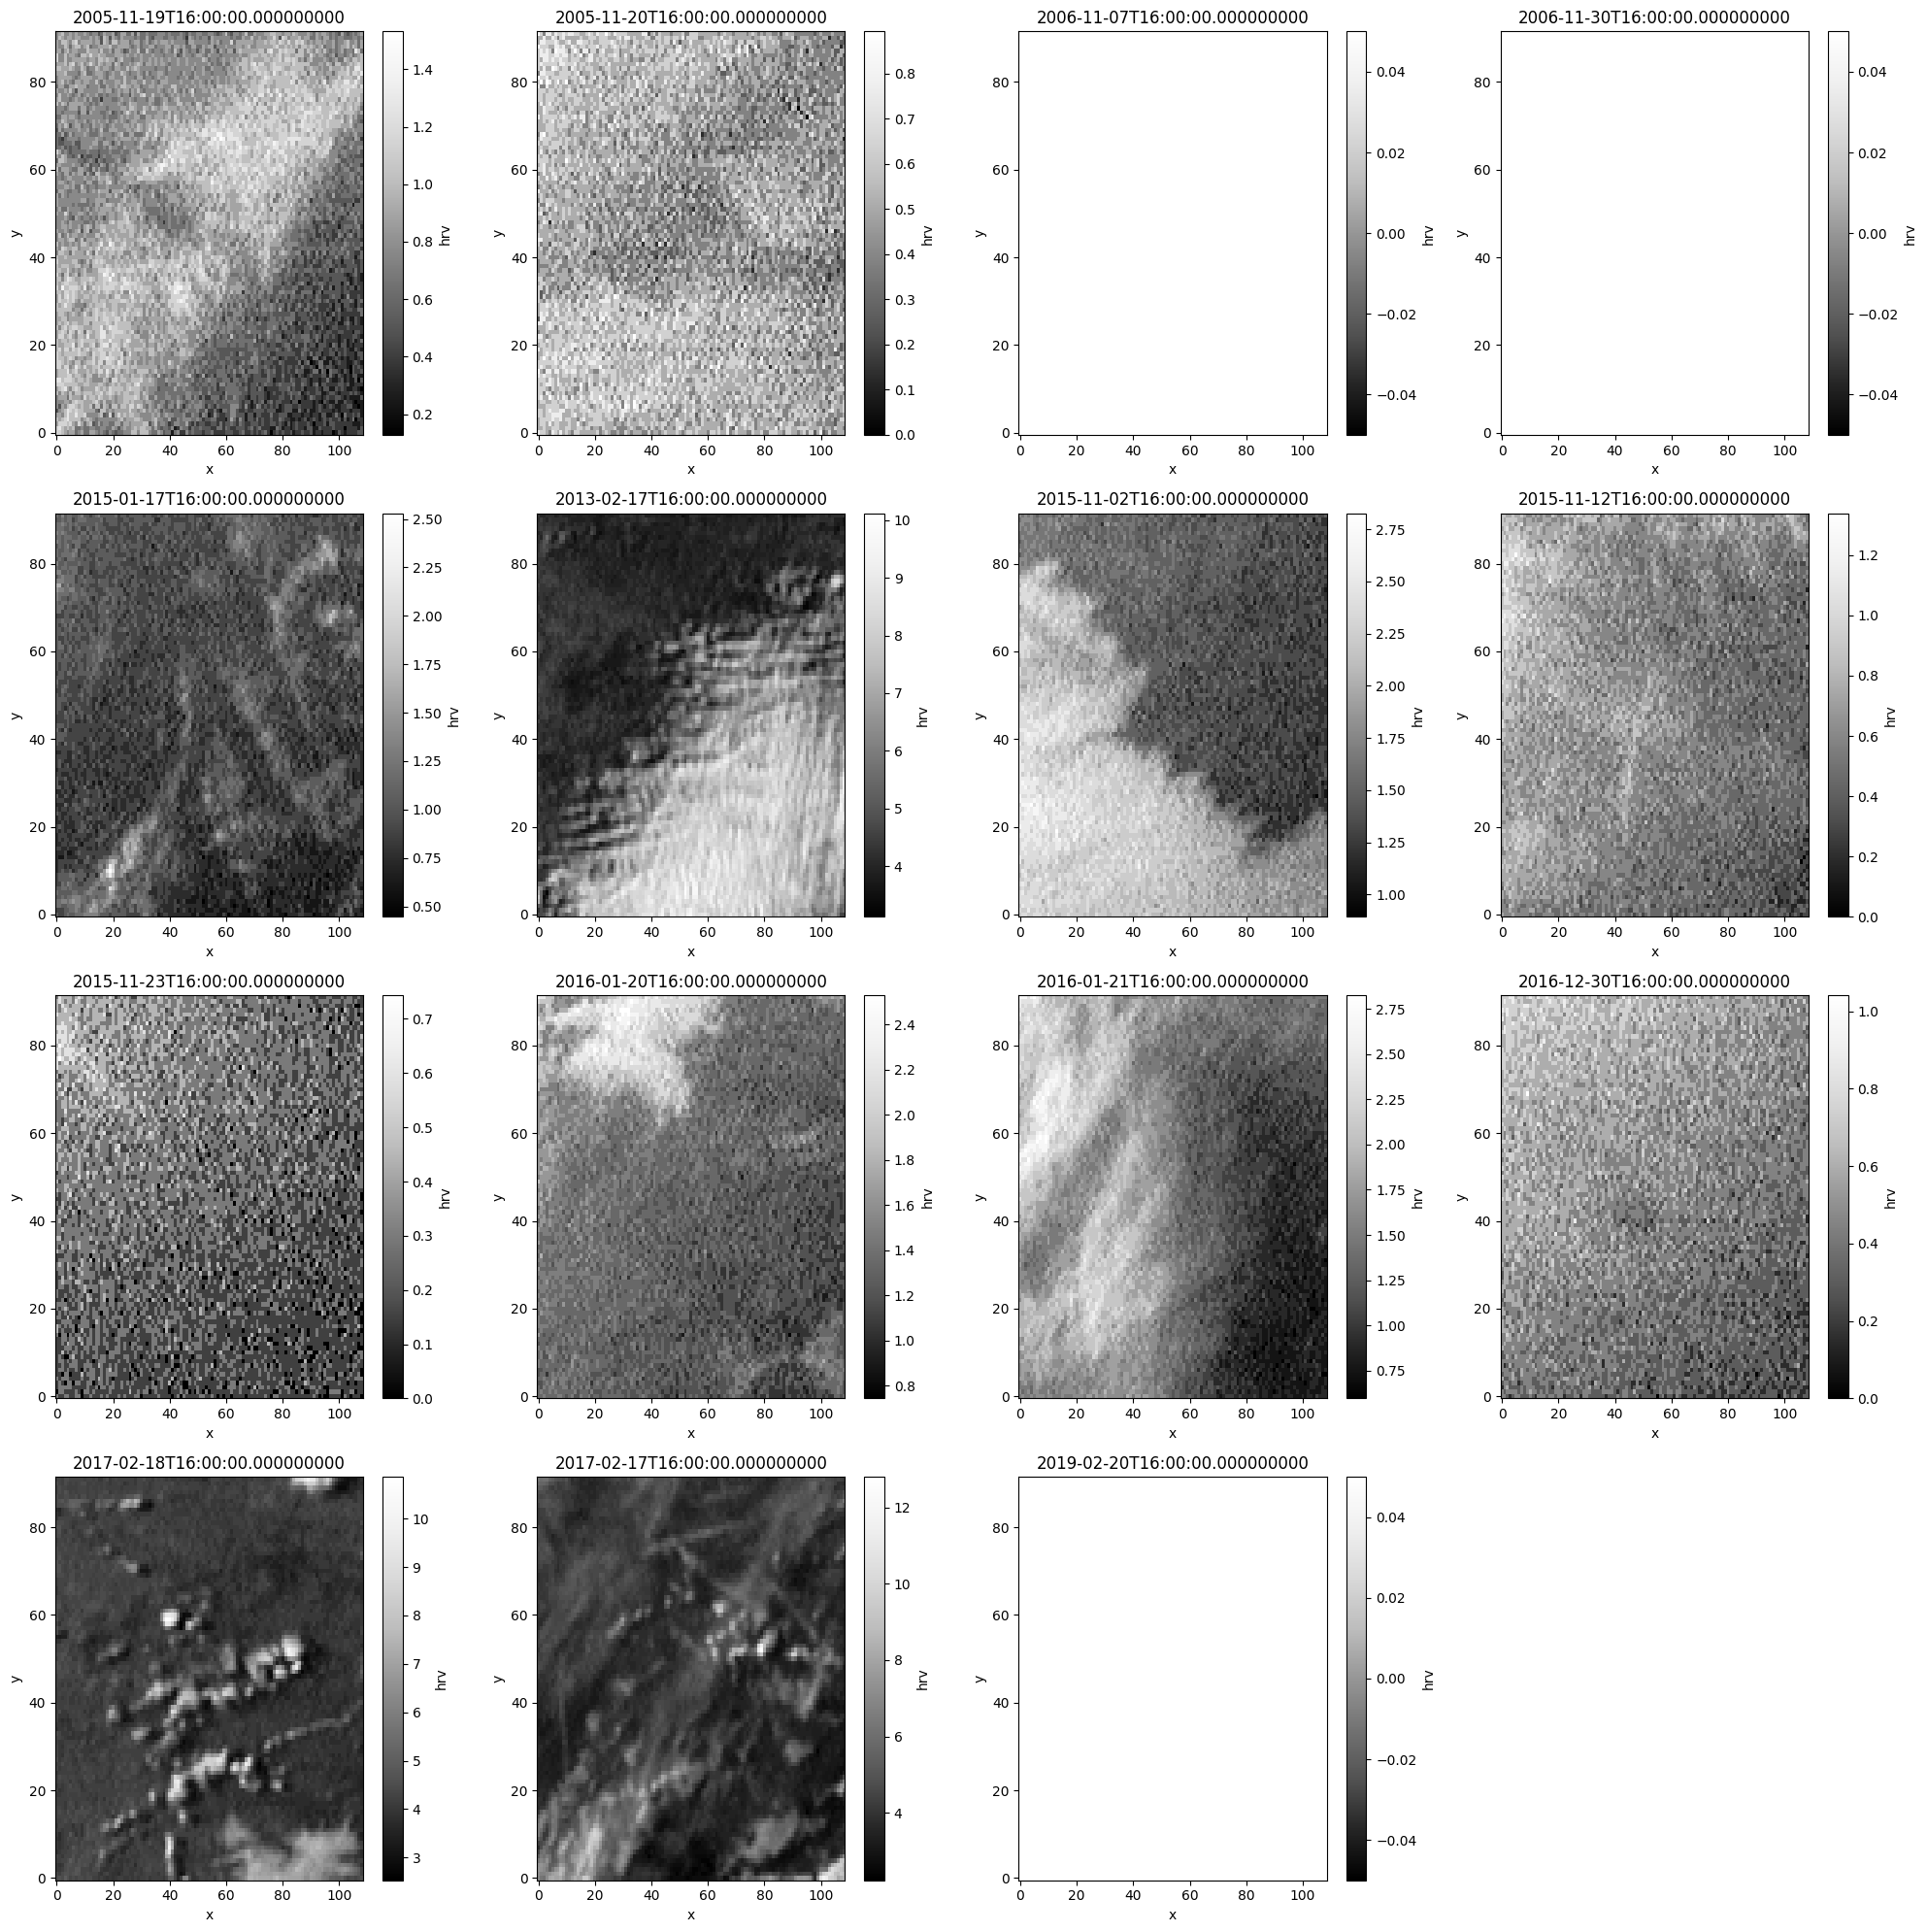

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr
cmap = plt.get_cmap('Greys_r')
import os
from datetime import datetime

def load_dataarrays(dates, time_str, directory='.'):
    """
    Loads xarray DataArrays based on a list of dates and a specific time in 'HH:MM:SS' format.

    Parameters:
    - dates: List of strings with dates in the format 'DD/MM/YYYY'.
    - time_str: Time string in the format 'HH:MM:SS' (e.g., '09:00:00').
    - directory: Directory path where the .nc files are located.

    Returns:
    - List of xarray.DataArray objects for each provided date and time.

    Raises:
    - FileNotFoundError if no file is found for a given month.
    - ValueError if more than one file is found for a given month.
    """
    dataarrays = []
    
    # Convert the time_str to a time object
    time = datetime.strptime(time_str, "%H:%M:%S").time()

    for date_str in dates:
        try: 
            print("working on: " + date_str)
            # Convert date string to datetime object from 'DD/MM/YYYY' format
            date = datetime.strptime(date_str, "%d/%m/%Y")
            
            # Combine the date and time into a full datetime object
            full_datetime = datetime.combine(date, time)
            
            # Format filename as 'hrv_lrYYYYMM.nc'
            filename_pattern = f"hrv_lr{date.strftime('%Y%m')}.nc"
            matching_files = [f for f in os.listdir(directory) if f.startswith('hrv_lr') and f.endswith('.nc') and f == filename_pattern]
            print(matching_files)
            # Check if we found exactly one matching file
            if len(matching_files) == 0:
                # raise FileNotFoundError(f"No file found for date {date_str}")
                filename_pattern = f"hrv_{date.strftime('%Y%m')}.nc"
                matching_files = [f for f in os.listdir(directory) if f.startswith('hrv_lr') and f.endswith('.nc') and f == filename_pattern]
                if len(matching_files) == 0:
                    with open("error_log.txt", "a") as error_file:
                        error_message = f"No datarray. File: {matching_files} Date: {date_str} Time: {time_str}\n"
                        error_file.write(error_message)

            elif len(matching_files) > 1:
                raise ValueError(f"Multiple files found for date {date_str}")
            
            # Open the file and select the data array for the specific date and time
            filepath = os.path.join(directory, matching_files[0])
            dataset = xr.open_dataset(filepath)
            
            # Select data for the specific date and time and append to the list
            dataarray = dataset.hrv.sel(time=full_datetime)
            dataarrays.append(dataarray)
        except Exception as e:
            print(f"File: {matching_files} Date: {date_str} Time: {time_str}  Unexpected error: {e}")
            with open("error_log.txt", "a") as error_file:
                error_message = f"File: {matching_files} Date: {date_str} Time: {time_str} Unexpected error: {e}\n"
                error_file.write(error_message)
    return dataarrays

def plot_dataarrays(dataarrays):
    num_dataarrays = len(dataarrays)
    
    # Calculate the number of rows and columns for subplots
    cols = int(np.ceil(np.sqrt(num_dataarrays)))  # Number of columns
    rows = int(np.ceil(num_dataarrays / cols))    # Number of rows
    
    fig, axes = plt.subplots(rows, cols, figsize=(5 * cols, 5 * rows), dpi=100)
    axes = axes.flatten() if num_dataarrays > 1 else [axes]  # Flatten axes if more than one subplot

    for i, ax in enumerate(axes):
        if i < num_dataarrays:
            dataarrays[i].plot(ax=ax, add_colorbar=True, cmap=cmap)  # Plot the DataArray on the current axis
            ax.set_title(f'{dataarrays[i].time.values.astype(str)}')
        else:
            ax.axis('off')  # Hide unused subplots if the number of DataArrays is less than the number of subplots

    plt.tight_layout()
    plt.show()

dates = [
    "19/11/2005",
    "20/11/2005",
    "07/11/2006",
    "30/11/2006",
    "19/02/2007",
    "17/01/2015",
    "17/02/2013",
    "02/11/2015",
    "12/11/2015",
    "23/11/2015",
    "20/01/2016",
    "21/01/2016",
    "30/12/2016",
    "18/02/2017",
    "17/02/2017",
    "05/02/2019",
    "13/02/2019",
    "20/02/2019"
]
time_str = '16:00:00'

dataarrays = load_dataarrays(dates, time_str, directory='/home/plato/dl_cloudhole/sat_data')
plot_dataarrays(dataarrays)

# problems will be logged in error_log.txt

In [ ]:
original_data = xr.open_dataset('./sat_data/hrv_lr201902.nc')
# 2019-02-05


<xarray.DataArray 'time' (time: 525)> Size: 4kB
array(['2019-02-07T11:00:00.000000000', '2019-02-07T11:15:00.000000000',
       '2019-02-07T11:30:00.000000000', ..., '2019-02-28T15:30:00.000000000',
       '2019-02-28T15:45:00.000000000', '2019-02-28T16:00:00.000000000'],
      dtype='datetime64[ns]')
Coordinates:
  * time     (time) datetime64[ns] 4kB 2019-02-07T11:00:00 ... 2019-02-28T16:...

#### Problems with Labeling

- 2013-02-17 - cloud_hole (8:00 - 9:15), else non-fog-hole
- 2015-11-02 - non-fog-hole (all day)
- 2015-01-17 - cloud_hole (8:30 - 12:30, 13:00 - 13:45), else non-fog-hole or NaN
- 2005-11-19 - cloud_hole (8:00 - 15:15), else non-fog-hole 
- 2005-11-20 - cloud_hole (8:15 - 13:15), else non-fog-hole 
- 2016-01-20 - cloud_hole (8:15 - 13:00), else non-fog-hole 
- 2016-12-30 - cloud_hole (10:15 - 14:15, 14:45 - 15:30), else non-fog-hole or NaN

In [2]:
import pandas as pd
labels = pd.read_csv('./labels.csv') \
            .reset_index(drop=True)  
labels = labels.set_index(pd.to_datetime(labels['date'] + ' ' + labels['time'], format='%d/%m/%Y %H:%M:%S')) \
            .drop(columns=['Unnamed: 0'])


labels.loc[(labels.index >= '2013-02-17 08:00:00') & (labels.index <= '2013-02-17 09:15:00'), 'label'] = "cloud_hole"

#### Assigning labels

In [3]:

def change_label_by_start_end_date(df, start, end, label):
    df.loc[(labels.index >= start) & (df.index <= end), 'label'] = label
    return df

labels = change_label_by_start_end_date(labels, "2015-11-02 08:00:00", "2015-11-02 16:00:00", "non_cloud_hole")

labels = change_label_by_start_end_date(labels, "2015-01-17 08:00:00", "2015-01-17 08:15:00", "non_cloud_hole")
labels = change_label_by_start_end_date(labels, "2015-01-17 08:30:00", "2015-01-17 12:30:00", "cloud_hole")
labels = change_label_by_start_end_date(labels, "2015-01-17 13:00:00", "2015-01-17 13:45:00", "cloud_hole")

labels = change_label_by_start_end_date(labels, "2005-11-19 08:00:00", "2005-11-19 15:15:00", "cloud_hole")
labels = change_label_by_start_end_date(labels, "2005-11-19 15:30:00", "2005-11-19 16:00:00", "non_cloud_hole")

labels = change_label_by_start_end_date(labels, "2005-11-20 08:15:00", "2005-11-20 13:15:00", "cloud_hole")
labels = change_label_by_start_end_date(labels, "2005-11-20 13:30:00", "2005-11-20 16:00:00", "non_cloud_hole")

labels = change_label_by_start_end_date(labels, "2016-12-30 08:00:00", "2016-12-30 10:00:00", "non_cloud_hole")
labels = change_label_by_start_end_date(labels, "2016-12-30 10:15:00", "2016-12-30 14:15:00", "cloud_hole")
labels = change_label_by_start_end_date(labels, "2016-12-30 14:20:00", "2016-12-30 14:40:00", "non_cloud_hole") # for 14:30
labels = change_label_by_start_end_date(labels, "2016-12-30 14:45:00", "2016-12-30 15:30:00", "cloud_hole")
labels = change_label_by_start_end_date(labels, "2016-12-30 15:45:00", "2016-12-30 16:00:00", "non_cloud_hole")

# 2016-01-20
labels = change_label_by_start_end_date(labels, "2016-01-20 08:00:00", "2016-01-20 08:10:00", "non_cloud_hole") # only 08:00 am
labels = change_label_by_start_end_date(labels, "2016-01-20 08:15:00", "2016-01-20 13:00:00", "cloud_hole") 
labels = change_label_by_start_end_date(labels, "2016-01-20 13:15:00", "2016-01-20 16:00:00", "non_cloud_hole") # only 08:00 am
labels = change_label_by_start_end_date(labels, "2019-01-30 08:00:00", "2019-01-30 16:00:00", "problem")
# if any with question marks remove

labels['label'] = labels['label'].str.replace('?', '', regex=False)

In [4]:
import pandas as pd

labels.loc[(labels.index >= '2016-12-30 08:00:00') & (labels.index <= '2016-12-30 16:00:00')]

,date,time,label,additional_label
2016-12-30 08:00:00,30/12/2016,8:00:00,non_cloud_hole,NaN
2016-12-30 08:15:00,30/12/2016,8:15:00,non_cloud_hole,NaN
2016-12-30 08:30:00,30/12/2016,8:30:00,non_cloud_hole,NaN
2016-12-30 08:45:00,30/12/2016,8:45:00,non_cloud_hole,NaN
2016-12-30 09:00:00,30/12/2016,9:00:00,non_cloud_hole,NaN
2016-12-30 09:15:00,30/12/2016,9:15:00,non_cloud_hole,NaN
2016-12-30 09:30:00,30/12/2016,9:30:00,non_cloud_hole,NaN
2016-12-30 09:45:00,30/12/2016,9:45:00,non_cloud_hole,NaN
2016-12-30 10:00:00,30/12/2016,10:00:00,non_cloud_hole,NaN
2016-12-30 10:15:00,30/12/2016,10:15:00,cloud_hole,NaN


In [67]:
labels.loc[labels['additional_label'] == 'snow']

,date,time,label,additional_label
2010-12-03 08:00:00,03/12/2010,8:00:00,non_cloud_hole,snow
2010-12-09 08:00:00,09/12/2010,8:00:00,non_cloud_hole,snow
2013-01-16 08:00:00,16/01/2013,8:00:00,non_cloud_hole,snow
2013-01-17 08:00:00,17/01/2013,8:00:00,non_cloud_hole,snow
2010-12-03 08:15:00,03/12/2010,8:15:00,non_cloud_hole,snow
...,...,...,...,...
2010-12-25 15:30:00,25/12/2010,15:30:00,non_cloud_hole,snow
2013-01-16 15:30:00,16/01/2013,15:30:00,non_cloud_hole,snow
2013-01-17 15:30:00,17/01/2013,15:30:00,non_cloud_hole,snow
2013-01-16 15:45:00,16/01/2013,15:45:00,non_cloud_hole,snow


In [5]:
# save csv after controls of labels
labels.to_csv("labels.csv")

#### how many dates have at least one cloud_hole label?

as a result, 7 years have cloud_hole label in consecutive dates

In [79]:
labels.groupby('date').apply(lambda group: "cloud_hole" in group['label'].values)

date
02/11/2015    False
03/12/2010    False
05/02/2019    False
07/11/2006    False
09/12/2010    False
12/11/2015    False
13/02/2019    False
16/01/2013    False
17/01/2013    False
17/01/2015     True
17/02/2013     True
17/02/2017     True
17/12/2010    False
18/02/2017     True
19/02/2007     True
19/11/2005     True
2/11/2015     False
20/01/2016     True
20/02/2019    False
20/11/2005     True
21/01/2016     True
23/11/2015    False
25/12/2010    False
30/01/2019    False
30/11/2006    False
30/12/2016     True
5/2/2019      False
7/11/2006     False
dtype: bool

In [ ]:
# 05/02/2019 13/02/2019

original_data_lr = xr.open_dataset('./sat_data/hrv_lr201902.nc')
original_data = xr.open_dataset('./sat_data/hrv_lr201902.nc')

original_data_lr.hrv.time.min(), original_data_lr.hrv.time.max(), original_data.hrv.time.min(), original_data.hrv.time.max() # 05/02/2019 not possible we don't have the data

print(original_data_lr.hrv.sel(time = "2019-02-13").compute())
print(original_data.sel(time = "2019-02-13").compute()) # 13/02/2019 has 0 values

<xarray.DataArray 'hrv' (time: 0, y: 92, x: 109)> Size: 0B
array([], shape=(0, 92, 109), dtype=float64)
Coordinates:
    lat      (y, x) float64 80kB 49.64 49.64 49.64 49.64 ... 48.09 48.09 48.09
    lon      (y, x) float64 80kB 1.56 1.575 1.589 1.604 ... 3.016 3.03 3.044
  * time     (time) datetime64[ns] 0B 
Dimensions without coordinates: y, x
<xarray.Dataset> Size: 160kB
Dimensions:  (time: 0, y: 92, x: 109)
Coordinates:
    lat      (y, x) float64 80kB 49.64 49.64 49.64 49.64 ... 48.09 48.09 48.09
    lon      (y, x) float64 80kB 1.56 1.575 1.589 1.604 ... 3.016 3.03 3.044
  * time     (time) datetime64[ns] 0B 
Dimensions without coordinates: y, x
Data variables:
    hrv      (time, y, x) float64 0B 


In [ ]:
original_data_lr = xr.open_dataset('./sat_data/hrv_lr201511.nc')
print("hrv_lr", original_data_lr.hrv.sel(time = "2006-11-07T08:00:00").compute().to_dataframe().hrv.unique())
# print("hrv_lr", original_data_lr.hrv.sel(time = "2006-11-30T11:00:00").compute().to_dataframe().hrv.unique())

In [43]:
original_data_lr.hrv.sel(time="2015-11-02").time

<xarray.DataArray 'time' (time: 33)> Size: 264B
array(['2015-11-02T08:00:00.000000000', '2015-11-02T08:15:00.000000000',
       '2015-11-02T08:30:00.000000000', '2015-11-02T08:45:00.000000000',
       '2015-11-02T09:00:00.000000000', '2015-11-02T09:15:00.000000000',
       '2015-11-02T09:30:00.000000000', '2015-11-02T09:45:00.000000000',
       '2015-11-02T10:00:00.000000000', '2015-11-02T10:15:00.000000000',
       '2015-11-02T10:30:00.000000000', '2015-11-02T10:45:00.000000000',
       '2015-11-02T11:00:00.000000000', '2015-11-02T11:15:00.000000000',
       '2015-11-02T11:30:00.000000000', '2015-11-02T11:45:00.000000000',
       '2015-11-02T12:00:00.000000000', '2015-11-02T12:15:00.000000000',
       '2015-11-02T12:30:00.000000000', '2015-11-02T12:45:00.000000000',
       '2015-11-02T13:00:00.000000000', '2015-11-02T13:15:00.000000000',
       '2015-11-02T13:30:00.000000000', '2015-11-02T13:45:00.000000000',
       '2015-11-02T14:00:00.000000000', '2015-11-02T14:15:00.000000000',
       '2015-11-02T14:30:00.000000000', '2015-11-02T14:45:00.000000000',
       '2015-11-02T15:00:00.000000000', '2015-11-02T15:15:00.000000000',
       '2015-11-02T15:30:00.000000000', '2015-11-02T15:45:00.000000000',
       '2015-11-02T16:00:00.000000000'], dtype='datetime64[ns]')
Coordinates:
  * time     (time) datetime64[ns] 264B 2015-11-02T08:00:00 ... 2015-11-02T16...

In [44]:
import matplotlib.pyplot as plt

filtered_data = original_data_lr.hrv.sel(time="2015-11-02")

ncols = 8
nrows = (len(filtered_data.time) + ncols - 1) // ncols

fig, axs = plt.subplots(nrows=nrows, ncols=ncols, figsize=(80, 80), constrained_layout=True)
axs = axs.ravel()  

for i, time in enumerate(filtered_data.time):
    ax = axs[i]  
    slice_data = filtered_data.sel(time=time)  
    
    slice_data.plot.pcolormesh(
        'lon', 'lat', 
        cmap=cmap,  
        robust=True, 
        ax=ax, 
        add_labels=False,
        cbar_kwargs={
            "label": "Reflectance",
            "pad": 0.04,
            "shrink": 0.75,
            "aspect": 20,
            "extend": "both",
            "format": "%0.1f"
        }
    )
    ax.set_title(str(time.values), fontsize=40) 

for ax in axs[len(filtered_data.time):]:
    ax.set_visible(False)

plt.show()


#### Labeling for Snow Dates

working on: 03/12/2010
['hrv_lr201012.nc']
working on: 09/12/2010
['hrv_lr201012.nc']
working on: 17/12/2010
['hrv_lr201012.nc']
working on: 25/12/2010
['hrv_lr201012.nc']
working on: 16/01/2013
['hrv_lr201301.nc']
working on: 17/01/2013
['hrv_lr201301.nc']
working on: 30/01/2019
['hrv_lr201901.nc']
File: ['hrv_lr201901.nc'] Date: 30/01/2019 Time: 15:45:00  Unexpected error: "not all values found in index 'time'. Try setting the `method` keyword argument (example: method='nearest')."


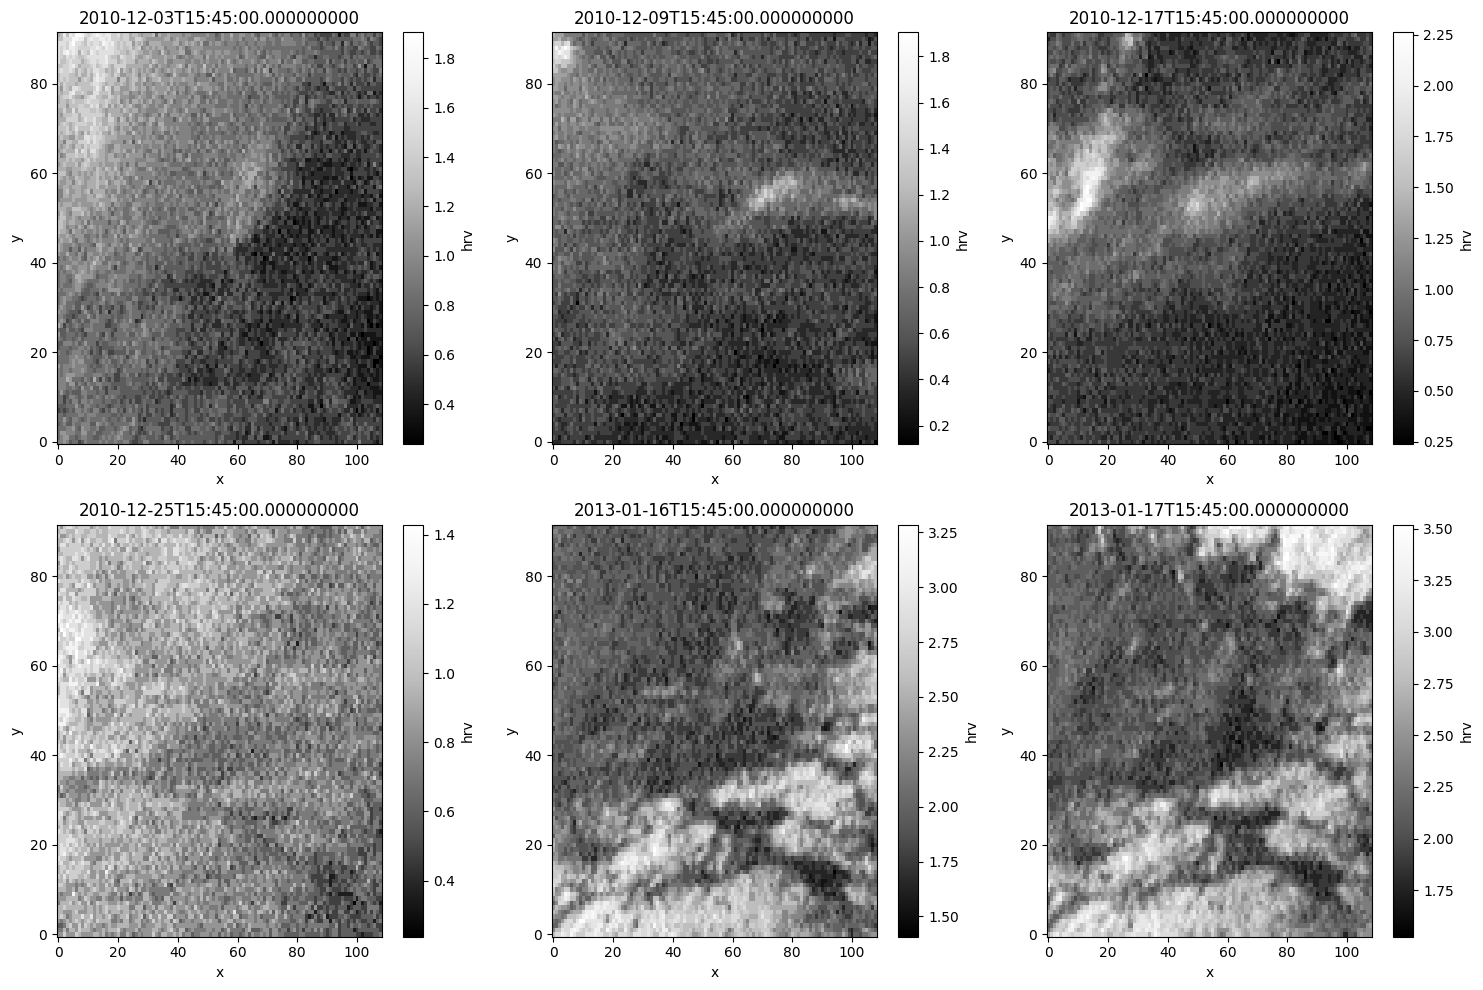

In [67]:
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr
cmap = plt.get_cmap('Greys_r')
import os
from datetime import datetime

def load_dataarrays(dates, time_str, directory='.'):
    """
    Loads xarray DataArrays based on a list of dates and a specific time in 'HH:MM:SS' format.

    Parameters:
    - dates: List of strings with dates in the format 'DD/MM/YYYY'.
    - time_str: Time string in the format 'HH:MM:SS' (e.g., '09:00:00').
    - directory: Directory path where the .nc files are located.

    Returns:
    - List of xarray.DataArray objects for each provided date and time.

    Raises:
    - FileNotFoundError if no file is found for a given month.
    - ValueError if more than one file is found for a given month.
    """
    dataarrays = []
    
    # Convert the time_str to a time object
    time = datetime.strptime(time_str, "%H:%M:%S").time()

    for date_str in dates:
        try: 
            print("working on: " + date_str)
            # Convert date string to datetime object from 'DD/MM/YYYY' format
            date = datetime.strptime(date_str, "%d/%m/%Y")
            
            # Combine the date and time into a full datetime object
            full_datetime = datetime.combine(date, time)
            
            # Format filename as 'hrv_lrYYYYMM.nc'
            filename_pattern = f"hrv_lr{date.strftime('%Y%m')}.nc"
            matching_files = [f for f in os.listdir(directory) if f.startswith('hrv_lr') and f.endswith('.nc') and f == filename_pattern]
            print(matching_files)
            # Check if we found exactly one matching file
            if len(matching_files) == 0:
                # raise FileNotFoundError(f"No file found for date {date_str}")
                filename_pattern = f"hrv_{date.strftime('%Y%m')}.nc"
                matching_files = [f for f in os.listdir(directory) if f.startswith('hrv_lr') and f.endswith('.nc') and f == filename_pattern]
                if len(matching_files) == 0:
                    with open("error_log.txt", "a") as error_file:
                        error_message = f"No datarray. File: {matching_files} Date: {date_str} Time: {time_str}\n"
                        error_file.write(error_message)

            elif len(matching_files) > 1:
                raise ValueError(f"Multiple files found for date {date_str}")
            
            # Open the file and select the data array for the specific date and time
            filepath = os.path.join(directory, matching_files[0])
            dataset = xr.open_dataset(filepath)
            
            # Select data for the specific date and time and append to the list
            dataarray = dataset.hrv.sel(time=full_datetime)
            dataarrays.append(dataarray)
        except Exception as e:
            print(f"File: {matching_files} Date: {date_str} Time: {time_str}  Unexpected error: {e}")
            with open("error_log.txt", "a") as error_file:
                error_message = f"File: {matching_files} Date: {date_str} Time: {time_str} Unexpected error: {e}\n"
                error_file.write(error_message)
    return dataarrays

def plot_dataarrays(dataarrays):
    num_dataarrays = len(dataarrays)
    
    # Calculate the number of rows and columns for subplots
    cols = int(np.ceil(np.sqrt(num_dataarrays)))  # Number of columns
    rows = int(np.ceil(num_dataarrays / cols))    # Number of rows
    
    fig, axes = plt.subplots(rows, cols, figsize=(5 * cols, 5 * rows), dpi=100)
    axes = axes.flatten() if num_dataarrays > 1 else [axes]  # Flatten axes if more than one subplot

    for i, ax in enumerate(axes):
        if i < num_dataarrays:
            dataarrays[i].plot(ax=ax, add_colorbar=True, cmap=cmap)  # Plot the DataArray on the current axis
            ax.set_title(f'{dataarrays[i].time.values.astype(str)}')
        else:
            ax.axis('off')  # Hide unused subplots if the number of DataArrays is less than the number of subplots

    plt.tight_layout()
    plt.show()

dates = [
    '03/12/2010',
    '09/12/2010',
    '17/12/2010',
    '25/12/2010',
    '16/01/2013',
    '17/01/2013',
    '30/01/2019'
]
time_str = '15:45:00'

dataarrays = load_dataarrays(dates, time_str, directory='/home/plato/kit/dl_cloudhole/sat_data')
plot_dataarrays(dataarrays)

# problems will be logged in error_log.txt

#### Problems with Snow Labeling

In [ ]:
# 2019-01-30 : hrv_lr201901 doesn't have the date --> 2019-01-30
original_data_lr = xr.open_dataset('./sat_data/hrv_lr201901.nc')

original_data_lr.hrv.time.min(), original_data_lr.hrv.time.max()

(<xarray.DataArray 'time' ()> Size: 8B
 array('2019-01-04T08:00:00.000000000', dtype='datetime64[ns]'),
 <xarray.DataArray 'time' ()> Size: 8B
 array('2019-01-27T15:45:00.000000000', dtype='datetime64[ns]'))